## Load Training / Testing Data

In [1]:
FileSaveFolder = "A:\\Files\\Shares\\Downloads\\yelp_dataset\\yelp_dataset~\\"
def LoadTrainTestData():
    import pickle
    with open(FileSaveFolder + "TrainTestData.dat", "rb") as filePath:
        train_x = pickle.load(file=filePath)
        train_y = pickle.load(file=filePath)
        test_x = pickle.load(file=filePath)
        test_y = pickle.load(file=filePath)
    return train_x, train_y, test_x, test_y

In [2]:
Train_X, Train_Y, Test_X, Test_Y = LoadTrainTestData()

In [3]:
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)
print(Test_Y.unique())

(151483, 1743)
(151483,)
(37871, 1743)
(37871,)
[2.  4.  3.  2.5 3.5]


### Trialing different XGB parameters

In [12]:
import pandas as pd
XGBResults = pd.DataFrame()

def AssessXGBRegression(x_train, y_train, x_test, y_test, Model):
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from datetime import datetime

    loopStartTime = datetime.now()
    print("Starting XGBRegressor at " + str(loopStartTime))

    Model.fit(x_train, y_train)
    xgbPredictor = Model.predict(x_test)

    loopEndTime = datetime.now()
    # results container
    results_list = pd.DataFrame(data = {
        "Name" : "XGBRegressor",
        "R2Score": r2_score(y_test, xgbPredictor),
        "RMSE": (mean_squared_error(y_test, xgbPredictor)),
        "MAE": mean_absolute_error(y_test, xgbPredictor),
        "ModelData" : Model,
        "RunTime": [str(loopEndTime - loopStartTime)],
        })

    print("\tEnding XGBRegressor at " + str(datetime.now()))

    return results_list

In [16]:
import pandas as pd
import copy

#for maxDepth in [6, 9, 12, 15]:
for maxDepth in [45, 90, 120]:
    import gc
    gc.collect()
#    for learningRate in [0.01, 0.05, 0.1, 0.33, 0.5]:
    for learningRate in [0.005]:
        from xgboost import XGBRegressor
        import warnings
        warnings.simplefilter(action='ignore', category=FutureWarning)
#        for estimatorsCount in [400, 800]:
        for estimatorsCount in [1600, 3200]:
        #estimatorsCount = 50 / learningRate

            xgbModel = XGBRegressor(objective = "reg:squarederror",
                                    booster = "gblinear",
                                    colsample_bytree = 1,
                                    colsample_bylevel = 1,
                                    colsample_bynode = 1,
                                    learning_rate = learningRate,
                                    max_depth = maxDepth,
                                    tree_method = "hist",
                                    grow_policy = "lossguide",
                                    n_estimators = estimatorsCount,
                                    nthread = 6,
                                   )

            testTrainResults = AssessXGBRegression(Train_X, Train_Y, Test_X, Test_Y, Model = xgbModel)
            testTrainResults["LearnRate"] = learningRate
            testTrainResults["MaxDepth"] = maxDepth
            testTrainResults["Estimators"] = estimatorsCount

            with pd.option_context("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", 20):
                display(testTrainResults.drop(["Name", "ModelData"], axis = 1))

            XGBResults = XGBResults.append(copy.deepcopy(testTrainResults), ignore_index = True)

            del xgbModel
            del testTrainResults
            gc.collect()

print("Loops Complete.")

Starting XGBRegressor at 2020-01-30 06:44:00.182555
	Ending XGBRegressor at 2020-01-30 06:55:11.215664


,R2Score,RMSE,MAE,RunTime,LearnRate,MaxDepth,Estimators
0,0.294529,0.389174,0.534688,0:11:11.030110,0.005,45,1600


Starting XGBRegressor at 2020-01-30 06:55:11.255651
	Ending XGBRegressor at 2020-01-30 07:19:33.088174


,R2Score,RMSE,MAE,RunTime,LearnRate,MaxDepth,Estimators
0,0.300221,0.386034,0.530678,0:24:21.829524,0.005,45,3200


Starting XGBRegressor at 2020-01-30 07:19:33.159152
	Ending XGBRegressor at 2020-01-30 07:31:10.342571


,R2Score,RMSE,MAE,RunTime,LearnRate,MaxDepth,Estimators
0,0.294527,0.389175,0.534688,0:11:37.180420,0.005,90,1600


Starting XGBRegressor at 2020-01-30 07:31:10.385558
	Ending XGBRegressor at 2020-01-30 07:54:28.662416


,R2Score,RMSE,MAE,RunTime,LearnRate,MaxDepth,Estimators
0,0.300221,0.386034,0.530678,0:23:18.273859,0.005,90,3200


Starting XGBRegressor at 2020-01-30 07:54:28.734394
	Ending XGBRegressor at 2020-01-30 08:06:18.546333


,R2Score,RMSE,MAE,RunTime,LearnRate,MaxDepth,Estimators
0,0.294528,0.389175,0.534688,0:11:49.808940,0.005,120,1600


Starting XGBRegressor at 2020-01-30 08:06:18.589319
	Ending XGBRegressor at 2020-01-30 08:29:36.917848


,R2Score,RMSE,MAE,RunTime,LearnRate,MaxDepth,Estimators
0,0.300221,0.386034,0.530678,0:23:18.318532,0.005,120,3200


Loops Complete.


In [10]:
XGBResults

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
0,XGBRegressor,0.147205,0.470445,0.582203,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:37.932701,0.01,6,400
1,XGBRegressor,0.294666,0.389099,0.534621,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:02.144523,0.01,6,800
2,XGBRegressor,0.299930,0.386195,0.530662,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:09.448855,0.05,6,400
3,XGBRegressor,0.299814,0.386258,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:07.319617,0.05,6,800
4,XGBRegressor,0.299814,0.386258,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:12.603993,0.10,6,400
5,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:22.609854,0.10,6,800
6,XGBRegressor,0.147213,0.470441,0.582202,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:20.237738,0.01,9,400
7,XGBRegressor,0.294668,0.389097,0.534622,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:11.800273,0.01,9,800
8,XGBRegressor,0.299925,0.386197,0.530659,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:10.054520,0.05,9,400
9,XGBRegressor,0.299814,0.386258,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:15.368790,0.05,9,800


In [6]:
XGBResults

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
0,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:05:32.823146,0.33,12,800
1,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:07.124341,0.33,12,1600
2,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:07.238595,0.50,12,800
3,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:04.633983,0.50,12,1600
4,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:11.650718,0.33,15,800
5,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:09.186099,0.33,15,1600
6,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:15.802777,0.50,15,800
7,XGBRegressor,0.299814,0.386259,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:14.483247,0.50,15,1600


In [9]:
XGBResults

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
0,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:05:32.823146,0.33,12,800
1,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:07.124341,0.33,12,1600
2,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:07.238595,0.50,12,800
3,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:04.633983,0.50,12,1600
4,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:11.650718,0.33,15,800
5,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:09.186099,0.33,15,1600
6,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:15.802777,0.50,15,800
7,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:14.483247,0.50,15,1600
8,XGBRegressor,0.294660,0.389102,0.534623,"XGBRegressor(base_score=0.5, booster='gblinear...",0:05:48.731189,0.01,12,800
9,XGBRegressor,0.300216,0.386037,0.530679,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:58.273305,0.01,12,1600


In [17]:
XGBResults

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
0,XGBRegressor,0.300217,0.386036,0.530680,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:27.226250,0.010,45,1600
1,XGBRegressor,0.299818,0.386256,0.530659,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:47.842858,0.010,45,3200
2,XGBRegressor,0.294529,0.389174,0.534688,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:11.030110,0.005,45,1600
3,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:24:21.829524,0.005,45,3200
4,XGBRegressor,0.294527,0.389175,0.534688,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:37.180420,0.005,90,1600
5,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:18.273859,0.005,90,3200
6,XGBRegressor,0.294528,0.389175,0.534688,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:49.808940,0.005,120,1600
7,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:18.318532,0.005,120,3200


In [18]:
import pickle
with open(FileSaveFolder + "XGBRegressorLinearResults5of10.dat", "wb") as filePath:
    pickle.dump(XGBResults, file=filePath)
# with open(FileSaveFolder + "XGBRegressorLinearResults3of10.dat", "rb") as filePath:
#     XGBResults = pickle.load(file=filePath)

In [18]:
# import pickle

# with open(FileSaveFolder + "XGBRegressorLinearResults3of10.dat", "rb") as filePath:
#     XGBResults = pickle.load(file=filePath)

In [19]:
XGBResults

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
0,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:05:32.823146,0.33,12,800
1,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:07.124341,0.33,12,1600
2,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:07.238595,0.50,12,800
3,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:04.633983,0.50,12,1600
4,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:11.650718,0.33,15,800
5,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:09.186099,0.33,15,1600
6,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:15.802777,0.50,15,800
7,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:14.483247,0.50,15,1600
8,XGBRegressor,0.294660,0.389102,0.534623,"XGBRegressor(base_score=0.5, booster='gblinear...",0:05:48.731189,0.01,12,800
9,XGBRegressor,0.300216,0.386037,0.530679,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:58.273305,0.01,12,1600


In [19]:
import pickle
import pandas as pd

XGBAggregateResults = pd.DataFrame()
for i in range(1,5):
    with open(FileSaveFolder + "XGBRegressorLinearResults{}of10.dat".format(str(i)), "rb") as filePath:
        XGBAggregateResults = XGBAggregateResults.append(pickle.load(file=filePath), ignore_index = True)

In [20]:
XGBAggregateResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
Name          49 non-null object
R2Score       49 non-null float64
RMSE          49 non-null float64
MAE           49 non-null float64
ModelData     49 non-null object
RunTime       49 non-null object
LearnRate     49 non-null float64
MaxDepth      49 non-null int64
Estimators    49 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ KB


In [21]:
XGBAggregateResults[XGBAggregateResults.duplicated(subset = ["LearnRate", "MaxDepth", "Estimators"], keep = False)].sort_values(["LearnRate", "MaxDepth", "Estimators"])

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
38,XGBRegressor,0.299814,0.386258,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:32.513364,0.1,15,800
39,XGBRegressor,0.299814,0.386258,0.53066,"XGBRegressor(base_score=0.5, booster='gblinear...",0:05:39.908102,0.1,15,800


In [22]:
XGBAggregateResults.drop_duplicates(subset = ["LearnRate", "MaxDepth", "Estimators"], inplace = True)

In [23]:
XGBAggregateResults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 9 columns):
Name          48 non-null object
R2Score       48 non-null float64
RMSE          48 non-null float64
MAE           48 non-null float64
ModelData     48 non-null object
RunTime       48 non-null object
LearnRate     48 non-null float64
MaxDepth      48 non-null int64
Estimators    48 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.8+ KB


In [25]:
import pickle
with open(FileSaveFolder + "XGBRegressorLinearResults-All.dat", "wb") as filePath:
    pickle.dump(XGBAggregateResults, file=filePath)

In [26]:
import pickle
with open(FileSaveFolder + "XGBRegressorLinearResults-All.dat", "rb") as filePath:
    XGBAggregateResults = pickle.load(file=filePath)

In [27]:
XGBAggregateResults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 9 columns):
Name          48 non-null object
R2Score       48 non-null float64
RMSE          48 non-null float64
MAE           48 non-null float64
ModelData     48 non-null object
RunTime       48 non-null object
LearnRate     48 non-null float64
MaxDepth      48 non-null int64
Estimators    48 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.8+ KB


In [28]:
with pd.option_context("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", 20):
    display(XGBAggregateResults)

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
0,XGBRegressor,0.147205,0.470445,0.582203,XGBRegressor(bas...,0:03:37.932701,0.010,6,400
1,XGBRegressor,0.294666,0.389099,0.534621,XGBRegressor(bas...,0:06:02.144523,0.010,6,800
2,XGBRegressor,0.299930,0.386195,0.530662,XGBRegressor(bas...,0:03:09.448855,0.050,6,400
3,XGBRegressor,0.299814,0.386258,0.530660,XGBRegressor(bas...,0:06:07.319617,0.050,6,800
4,XGBRegressor,0.299814,0.386258,0.530660,XGBRegressor(bas...,0:03:12.603993,0.100,6,400
5,XGBRegressor,0.299814,0.386259,0.530660,XGBRegressor(bas...,0:06:22.609854,0.100,6,800
6,XGBRegressor,0.147213,0.470441,0.582202,XGBRegressor(bas...,0:03:20.237738,0.010,9,400
7,XGBRegressor,0.294668,0.389097,0.534622,XGBRegressor(bas...,0:06:11.800273,0.010,9,800
8,XGBRegressor,0.299925,0.386197,0.530659,XGBRegressor(bas...,0:03:10.054520,0.050,9,400
9,XGBRegressor,0.299814,0.386258,0.530660,XGBRegressor(bas...,0:06:15.368790,0.050,9,800


In [22]:
XGBAggregateResults = XGBAggregateResults.append(XGBResults).reset_index()

In [28]:
XGBAggregateResults = XGBAggregateResults.sort_values(by=["LearnRate", "MaxDepth", "Estimators"], ascending = True).reset_index()

In [29]:
def PlotParameterCurves(DataSeries, TargetColumnLabel, width = 7, height = 7):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plot
    %matplotlib inline

    # Calculate maximums
    learnRateValues = pd.Series(np.sort(DataSeries["LearnRate"].unique()))
    learnRateMaximums = pd.Series([DataSeries.loc[(DataSeries["LearnRate"] == rate), TargetColumnLabel].max() for rate in learnRateValues.to_list()])

    maxDepthValues = pd.Series(np.sort(DataSeries["MaxDepth"].unique()))
    maxDepthMaximums = pd.Series([DataSeries.loc[(DataSeries["MaxDepth"] == rate), TargetColumnLabel].max() for rate in maxDepthValues.to_list()])
    
    estimatorsValues = pd.Series(np.sort(DataSeries["Estimators"].unique()))
    estimatorsMaximums = pd.Series([DataSeries.loc[(DataSeries["Estimators"] == rate), TargetColumnLabel].max() for rate in estimatorsValues.to_list()])

    # Plot maximums
    plot.close("all")
    #axis = plot.figure(figsize = (width, height)).add_subplot(111)  # RowsColumnsIndex
    figure, axes = plot.subplots(3, figsize = (width, height))

    axes[0].scatter(learnRateValues, learnRateMaximums, s = 15, edgecolors = None, label = "Learn Rate")
    axes[1].scatter(maxDepthValues, maxDepthMaximums, s = 15, edgecolors = None, label = "MaxDepth")
    axes[2].scatter(estimatorsValues, estimatorsMaximums, s = 15, edgecolors = None, label = "Estimators")
    plot.show()

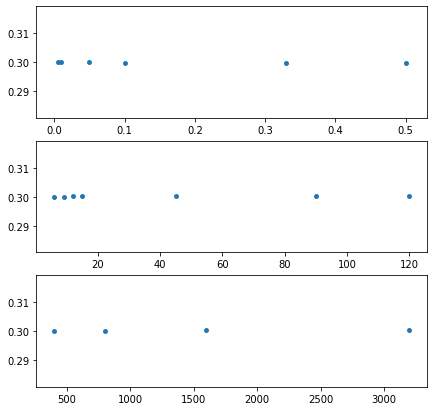

In [30]:
PlotParameterCurves(XGBAggregateResults, "R2Score")

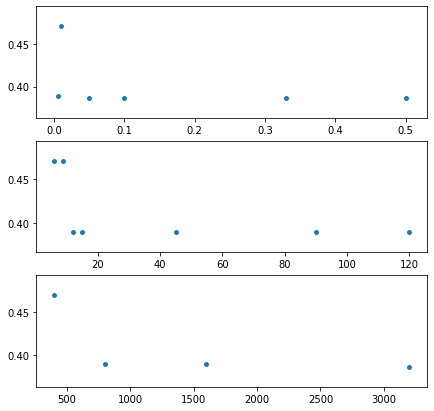

In [31]:
PlotParameterCurves(XGBAggregateResults[XGBAggregateResults["RMSE"] < 0.5], "RMSE")

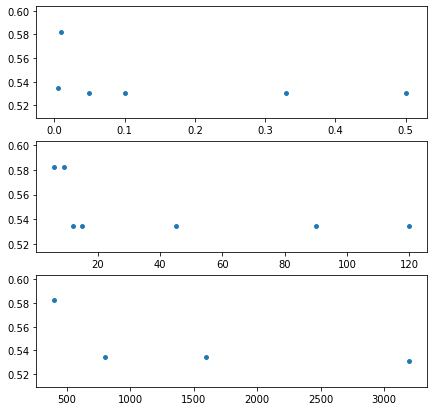

In [33]:
PlotParameterCurves(XGBAggregateResults[XGBAggregateResults["MAE"] < 0.6], "MAE")

In [34]:
XGBAggregateResults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 9 columns):
Name          48 non-null object
R2Score       48 non-null float64
RMSE          48 non-null float64
MAE           48 non-null float64
ModelData     48 non-null object
RunTime       48 non-null object
LearnRate     48 non-null float64
MaxDepth      48 non-null int64
Estimators    48 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.8+ KB


In [35]:
XGBAggregateResults.describe()

,R2Score,RMSE,MAE,LearnRate,MaxDepth,Estimators
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.292751,0.390155,0.533392,0.166042,21.250000,1150.000000
std,0.030726,0.016950,0.010383,0.187310,27.785271,767.976063
min,0.147205,0.386034,0.530659,0.005000,6.000000,400.000000
25%,0.299814,0.386258,0.530660,0.010000,9.000000,800.000000
50%,0.299814,0.386259,0.530660,0.075000,12.000000,800.000000
75%,0.299814,0.386259,0.530679,0.330000,15.000000,1600.000000
max,0.300221,0.470445,0.582203,0.500000,120.000000,3200.000000


In [36]:
XGBAggregateResults.sort_values("R2Score", ascending = False).head(5)

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
44,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:24:21.829524,0.005,45,3200
46,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:18.273859,0.005,90,3200
48,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:18.318532,0.005,120,3200
41,XGBRegressor,0.300217,0.386036,0.530680,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:27.226250,0.010,45,1600
35,XGBRegressor,0.300216,0.386037,0.530679,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:21.107865,0.010,15,1600


In [37]:
XGBAggregateResults.sort_values("RMSE", ascending = True).head(5)

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
44,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:24:21.829524,0.005,45,3200
46,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:18.273859,0.005,90,3200
48,XGBRegressor,0.300221,0.386034,0.530678,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:18.318532,0.005,120,3200
41,XGBRegressor,0.300217,0.386036,0.530680,"XGBRegressor(base_score=0.5, booster='gblinear...",0:11:27.226250,0.010,45,1600
35,XGBRegressor,0.300216,0.386037,0.530679,"XGBRegressor(base_score=0.5, booster='gblinear...",0:12:21.107865,0.010,15,1600


In [38]:
XGBAggregateResults.sort_values("MAE", ascending = True).head(5)

,Name,R2Score,RMSE,MAE,ModelData,RunTime,LearnRate,MaxDepth,Estimators
42,XGBRegressor,0.299818,0.386256,0.530659,"XGBRegressor(base_score=0.5, booster='gblinear...",0:23:47.842858,0.01,45,3200
8,XGBRegressor,0.299925,0.386197,0.530659,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:10.054520,0.05,9,400
10,XGBRegressor,0.299814,0.386259,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:03:12.113876,0.10,9,400
30,XGBRegressor,0.299814,0.386258,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:04.638349,0.05,12,800
36,XGBRegressor,0.299814,0.386258,0.530660,"XGBRegressor(base_score=0.5, booster='gblinear...",0:06:32.746041,0.05,15,800


In [39]:
XGBAggregateResults["ModelData"][44]

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             grow_policy='lossguide', importance_type='gain',
             learning_rate=0.005, max_delta_step=0, max_depth=45,
             min_child_weight=1, missing=nan, n_estimators=3200, n_jobs=1,
             nthread=6, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='hist', verbosity=1)

In [40]:
import pickle
with open("XGBRegressorLinearModel.dat", "wb") as filePath:
    pickle.dump(XGBAggregateResults["ModelData"][28], file=filePath)